In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from statsmodels.compat import lzip
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


Load and check data

In [2]:
houses=pd.read_csv('kc_house_data.csv')
houses.reset_index()
houses# Not clear yet why we have to call this method

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
houses.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [4]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
houses.shape# Number of rows and columns

(21597, 21)

In [6]:
houses.info# what other different information we obtain differnt than calling .head()

<bound method DataFrame.info of                id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  

In [7]:
houses.describe()# how could I see the rest of the columns

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
houses.isna().any()# Return which columns have missing or NaN values

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [9]:
houses.isna().sum()# Check how many of the missing or NaN values we have

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [10]:
mean_waterfront=houses['waterfront'].mean()# Replace values for waterfront with the mean value of that column
display(mean_waterfront)
houses['waterfront'].fillna(mean_waterfront,inplace=True)
houses.isna().sum()

0.007595858696217679

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Approach to data cleanning
Waterfront: replace with the mean of column value
View:replace with the mean value
Year_renovated: Assume no renovation has taken place and just take the same year that has been built

In [11]:
mean_view=houses['view'].mean()
display(mean_view)
houses['view'].fillna(mean_view,inplace=True)
houses.isna().sum()

0.23386272870808952

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#Checking the different values are stored on that column
houses['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [13]:
houses['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

There are two values that we need to change:nan and o, for both I will change it to yr_built and assume no renovation

In [14]:
houses['yr_renovated'].fillna(houses['yr_built'], inplace = True)#Replace nan values in yr_renovated

In [15]:
#Rechecking for Nulls
display(houses.isna().sum())
display(houses.shape)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

(21597, 21)

In [16]:
houses['yr_renovated'].value_counts()

0.0       17011
2014.0      175
2003.0      108
2005.0      101
2007.0      100
          ...  
1917.0        6
1934.0        6
1901.0        6
1936.0        5
1904.0        4
Name: yr_renovated, Length: 117, dtype: int64

In [17]:
houses['yr_renovated']=houses['yr_renovated'].replace(0,np.nan)#Replace zero values with nan, then nan with yr_built     
houses['yr_renovated'].fillna(houses['yr_built'], inplace = True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19789,9126100765,8/1/2014,455000.0,3,1.75,1320,1014,3.0,0.0,0.0,...,9,1320,0.0,2015,2015.0,98122,47.6047,-122.305,1380,1495
20836,1257201420,7/9/2014,595000.0,4,3.25,3730,4560,2.0,0.0,0.0,...,9,2760,970.0,2015,2015.0,98103,47.6725,-122.330,1800,4560
21356,6169901185,5/20/2014,490000.0,5,3.50,4460,2975,3.0,0.0,2.0,...,10,3280,?,2015,2015.0,98119,47.6313,-122.370,2490,4231
14202,8156600210,3/26/2015,1290000.0,5,3.50,2980,5100,2.0,0.0,0.0,...,10,2370,610.0,2015,2015.0,98115,47.6782,-122.299,1780,5100
8032,1250200495,6/24/2014,455000.0,2,1.50,1200,1259,2.0,0.0,0.0,...,8,1000,200.0,2015,2015.0,98144,47.6001,-122.298,1320,1852


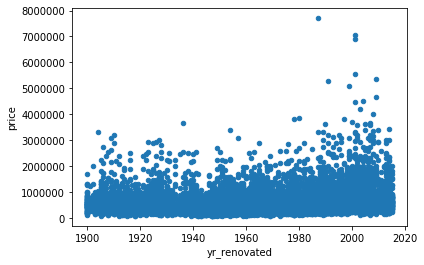

In [18]:
#Plotting the year renovated with price
houses = houses.sort_values('yr_renovated', ascending = False)
display(houses.head())
houses.plot(kind = 'scatter', x ='yr_renovated', y = 'price')


In [19]:
#Checking for duplicates on houses with the same id, meaning it has been sold more than once during this period
houses.sort_values('id')
houses.drop_duplicates('id', keep='last', inplace=True)#subset which we want the duplications removed
houses.shape


(21420, 21)

Exploring some of our colums in relation to price to check for outliners 

In [20]:
# #Cols=['bedrooms', 'bathrooms', 'sqft_living',
#        'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
#        'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']


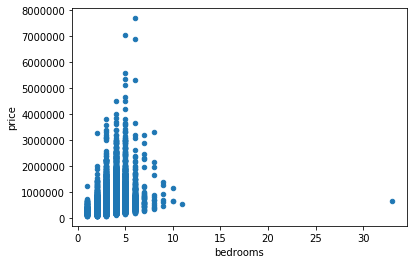

In [21]:
#Sorting by bedroom - identify outlier
houses = houses.sort_values('bedrooms', ascending = False)

#plotting bedrooms by Price 
houses.plot(kind = 'scatter', x ='bedrooms', y = 'price')

In [22]:
#Remove the row with the outliner value, 33 bedrooms row
houses.drop(houses.loc[houses.bedrooms==33].index,inplace=True)

In [23]:
houses = houses.sort_values('bedrooms', ascending = False)
houses.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,8/14/2014,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,2008.0,98004,47.5861,-122.113,2730,10400
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,1913.0,98105,47.6635,-122.320,1810,3745
15147,5566100170,10/29/2014,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,1958.0,98006,47.5705,-122.175,2040,11914
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,1938.0,98103,47.6927,-122.338,1460,6291


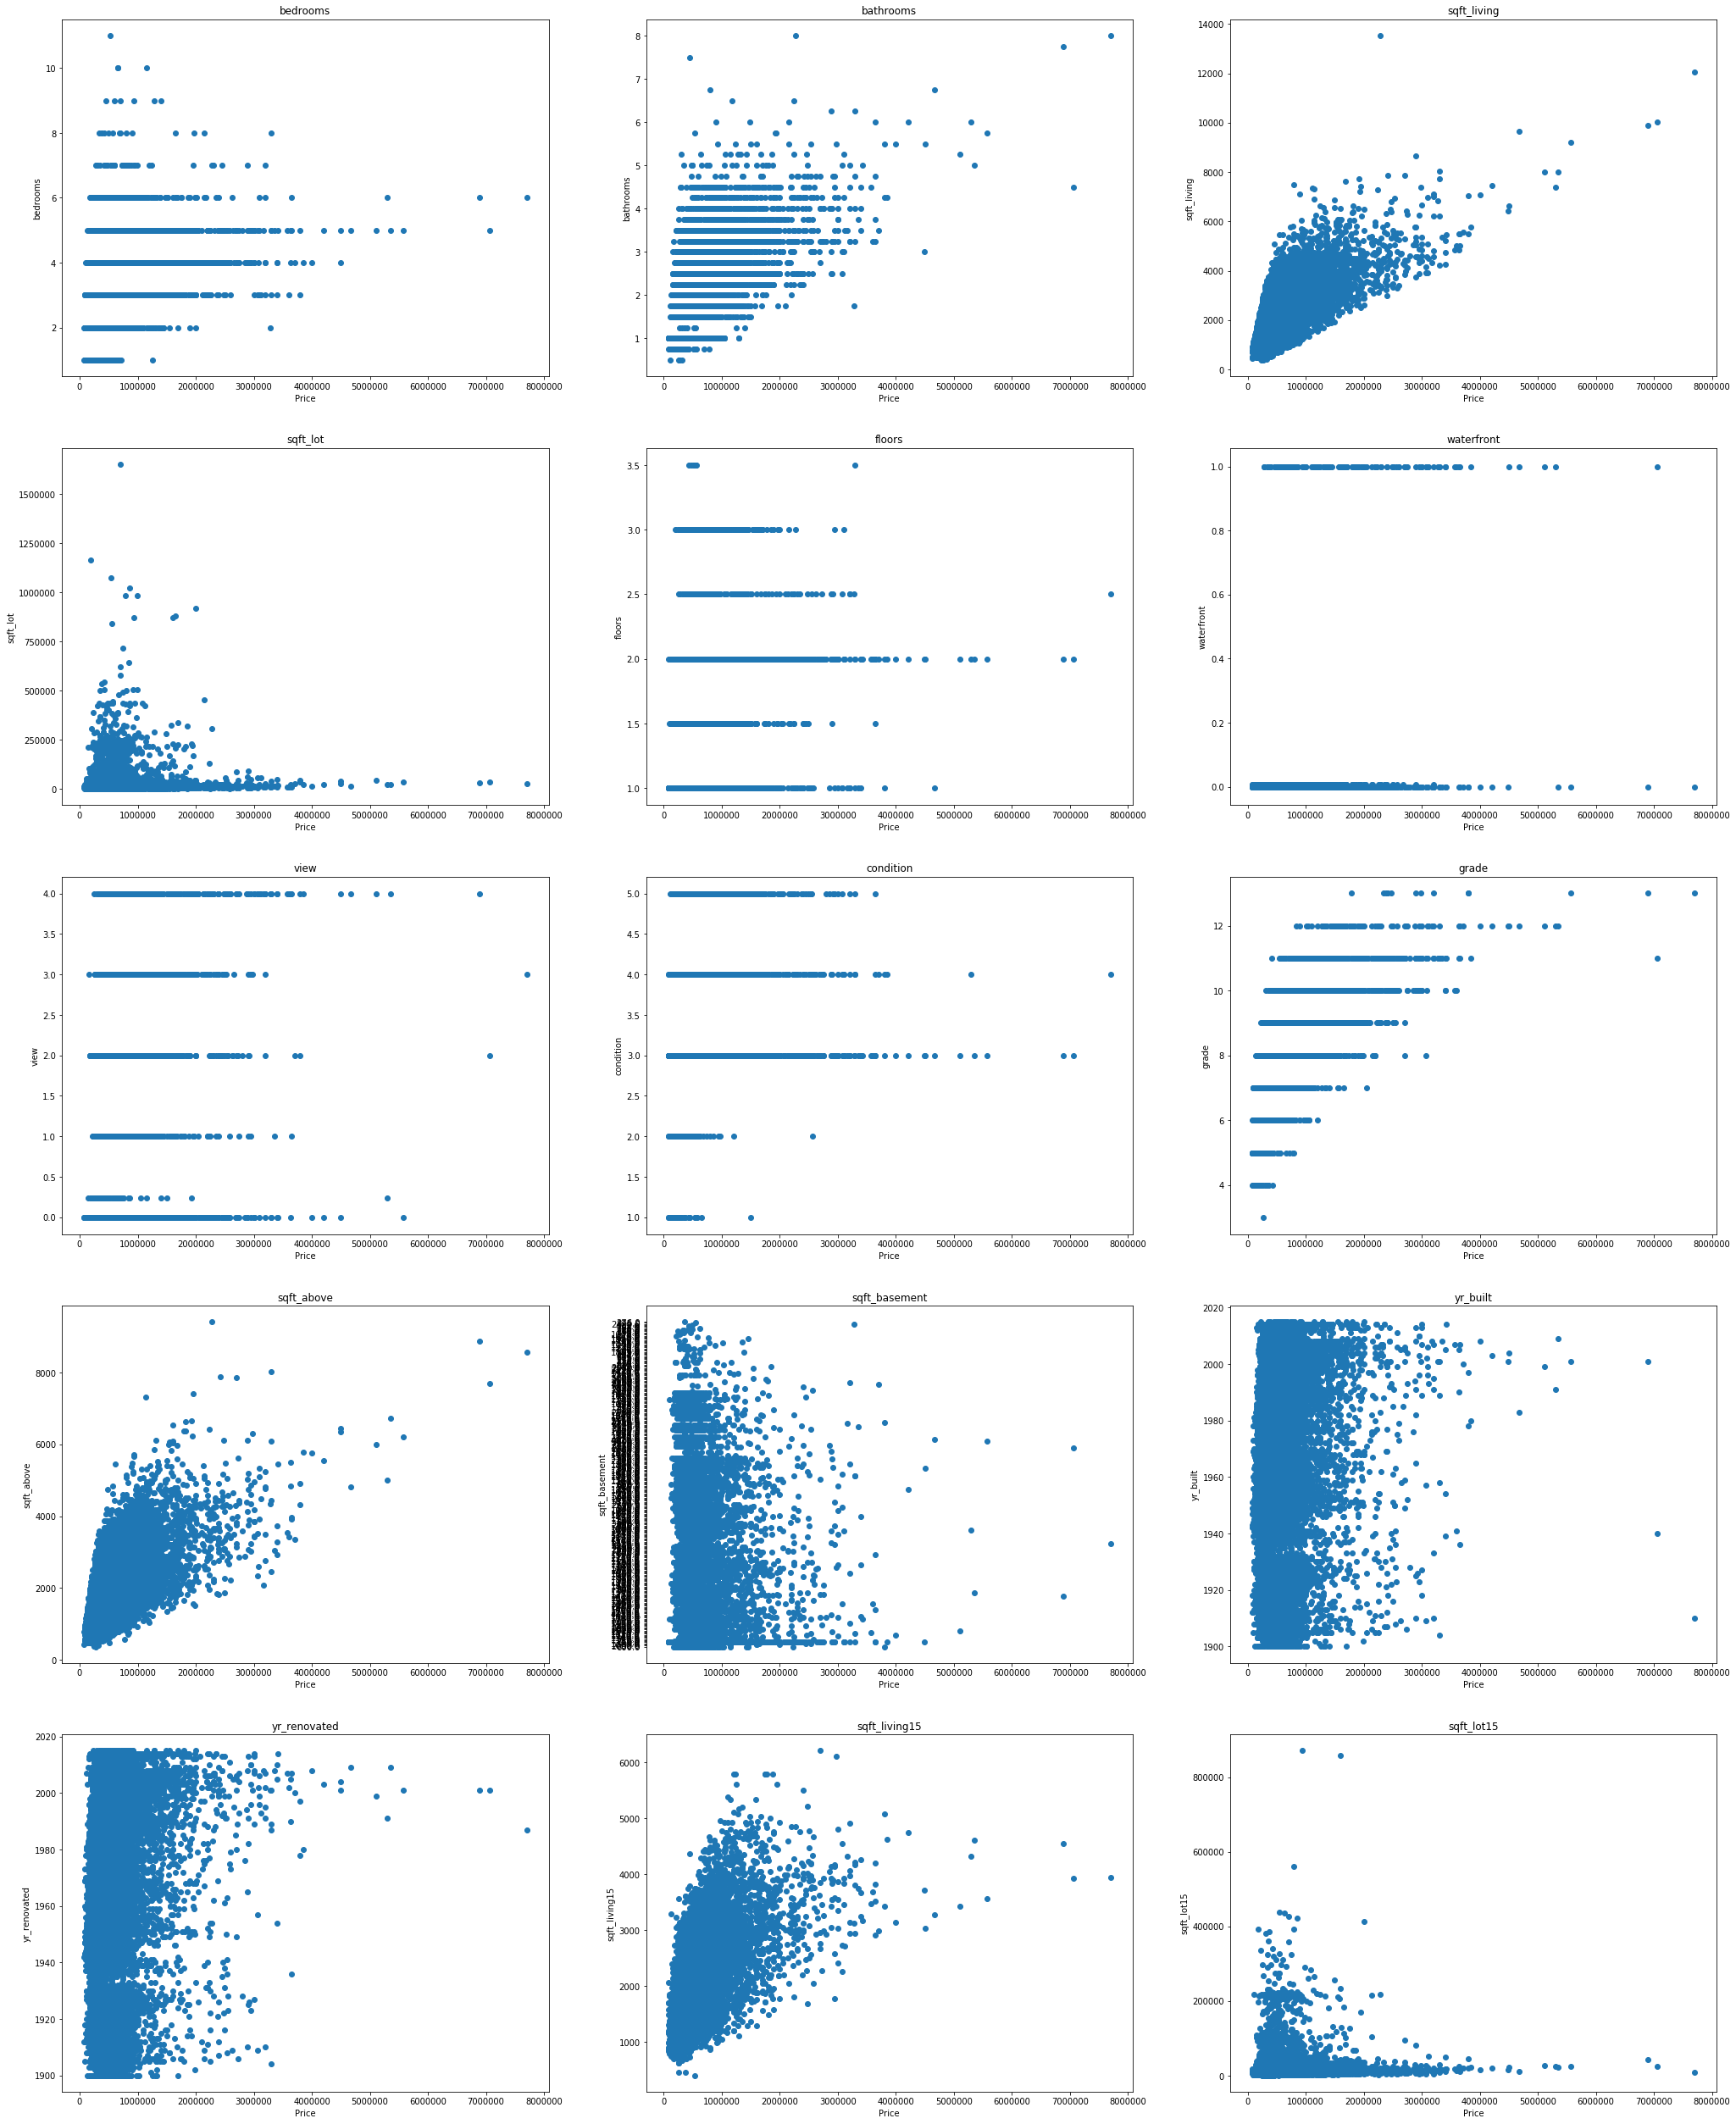

In [24]:
#Let's plot the relevant columns data against price
Cols=['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(35,45))

for i in range(1,len(Cols)+1):
    row = (i-1)//3
    col = i%3-1
    ax = axes[row][col]
    y_new = houses[Cols[i-1]]
    ax.scatter(houses['price'],y_new)
    ax.set_title(Cols[i-1])
    ax.set_xlabel('Price')
    ax.set_ylabel(Cols[i-1])

In [25]:
#sqft living outlier removal using standard deviation


#Create column with std deviation for sqft_living variable 
houses['sqft_living_std'] = houses['sqft_living'].std()

#Create column with how many std deviation away from the mean each value for sqft living is
houses['outlier_sqft'] = (houses ['sqft_living'] - houses['sqft_living'].mean())/houses['sqft_living_std']

houses.drop( houses.loc[houses.outlier_sqft > 2]. index, inplace = True )#drop values higher than 2 std deviation of mean
houses.drop( houses.loc[houses.outlier_sqft < -2]. index, inplace = True) #keep values greater than -2 std deviation of mean 
houses.sort_values('outlier_sqft', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_std,outlier_sqft
20012,9510860750,1/8/2015,918000.0,5,3.50,3920,5150,2.0,0.007596,0.0,...,1100.0,2004,2004.0,98052,47.6638,-122.084,3170,5530,918.824411,1.999126
10963,3295610200,6/25/2014,770000.0,4,2.50,3920,12415,2.0,0.000000,0.0,...,0.0,1997,1997.0,98075,47.5658,-122.032,3639,12805,918.824411,1.999126
11943,205000310,6/24/2014,850000.0,4,3.50,3920,37122,2.0,0.000000,0.0,...,0.0,1996,1996.0,98053,47.6316,-121.988,2550,32647,918.824411,1.999126
10068,2481630030,4/27/2015,965000.0,4,2.50,3920,41206,2.0,0.000000,0.0,...,0.0,1988,1988.0,98072,47.7325,-122.132,3780,36562,918.824411,1.999126
12803,5700000180,12/8/2014,760000.0,5,2.00,3920,5250,1.5,0.000000,0.0,...,1360.0,1910,1910.0,98144,47.5798,-122.294,1830,4240,918.824411,1.999126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488,4322200105,3/31/2015,229050.0,1,1.00,420,3298,1.0,0.000000,0.0,...,0.0,1949,1949.0,98136,47.5375,-122.391,1460,4975,918.824411,-1.810089
8614,6303400395,1/30/2015,325000.0,1,0.75,410,8636,1.0,0.000000,0.0,...,0.0,1953,1953.0,98146,47.5077,-122.357,1190,8636,918.824411,-1.820973
21316,9266700190,5/11/2015,245000.0,1,1.00,390,2000,1.0,0.000000,0.0,...,0.0,1920,1920.0,98103,47.6938,-122.347,1340,5100,918.824411,-1.842740
860,1723049033,6/20/2014,245000.0,1,0.75,380,15000,1.0,0.000000,0.0,...,0.0,1963,1963.0,98168,47.4810,-122.323,1170,15000,918.824411,-1.853623


In [26]:
#grading outlier removal using standard deviation


#Create column with std deviation for grading variable 
houses['grade_std'] = houses['grade'].std()

#Create column with how many std deviation away from the mean each value for sqft living is
houses['outlier_grade'] = (houses ['grade'] - houses['grade'].mean())/houses['grade_std']

houses.drop( houses.loc[houses.outlier_grade > 2]. index, inplace = True )#drop values higher than 2 std deviation of mean
houses.drop( houses.loc[houses.outlier_grade < -2]. index, inplace = True) #keep values greater than -2 std deviation of mean 
houses.sort_values('outlier_grade', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_living_std,outlier_sqft,grade_std,outlier_grade
4409,868001030,9/15/2014,1150000.0,4,2.25,3740,18000,1.0,0.000000,0.0,...,1951.0,98177,47.7027,-122.378,2610,10902,918.824411,1.803223,1.044135,1.383559
1072,2485000202,4/10/2015,986000.0,3,2.50,2380,16080,1.0,0.000000,2.0,...,1964.0,98136,47.5262,-122.386,2560,10070,918.824411,0.323071,1.044135,1.383559
4439,8651611690,6/20/2014,812000.0,3,3.25,3240,8338,2.0,0.000000,0.0,...,2001.0,98074,47.6321,-122.064,3420,8405,918.824411,1.259050,1.044135,1.383559
20545,6306810110,11/17/2014,485230.0,4,2.50,2714,12558,2.0,0.000000,0.0,...,2014.0,98031,47.3522,-122.201,2873,8269,918.824411,0.686579,1.044135,1.383559
15815,5360200052,2/24/2015,499950.0,3,2.50,2580,23925,2.0,0.000000,0.0,...,2001.0,98023,47.2978,-122.376,1660,8460,918.824411,0.540741,1.044135,1.383559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17143,1446400715,4/22/2015,280000.0,2,1.00,1310,6600,1.0,0.000000,0.0,...,1942.0,98168,47.4834,-122.332,1240,6600,918.824411,-0.841460,1.044135,-1.489632
15900,5370200170,2/17/2015,325000.0,2,1.00,1070,5080,1.0,0.007596,0.0,...,1942.0,98106,47.5224,-122.350,900,5080,918.824411,-1.102664,1.044135,-1.489632
13271,7454000555,1/13/2015,272000.0,2,1.00,670,6300,1.0,0.000000,0.0,...,1942.0,98126,47.5145,-122.374,740,6300,918.824411,-1.538003,1.044135,-1.489632
10709,2586800140,11/18/2014,135000.0,2,1.00,830,7609,1.0,0.000000,0.0,...,1943.0,98146,47.5057,-122.348,1170,7609,918.824411,-1.363867,1.044135,-1.489632


In [27]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_living_std',
       'outlier_sqft', 'grade_std', 'outlier_grade'],
      dtype='object')

In [28]:
houses.drop(['outlier_sqft', 'grade_std','outlier_grade'],axis=1, inplace= True)

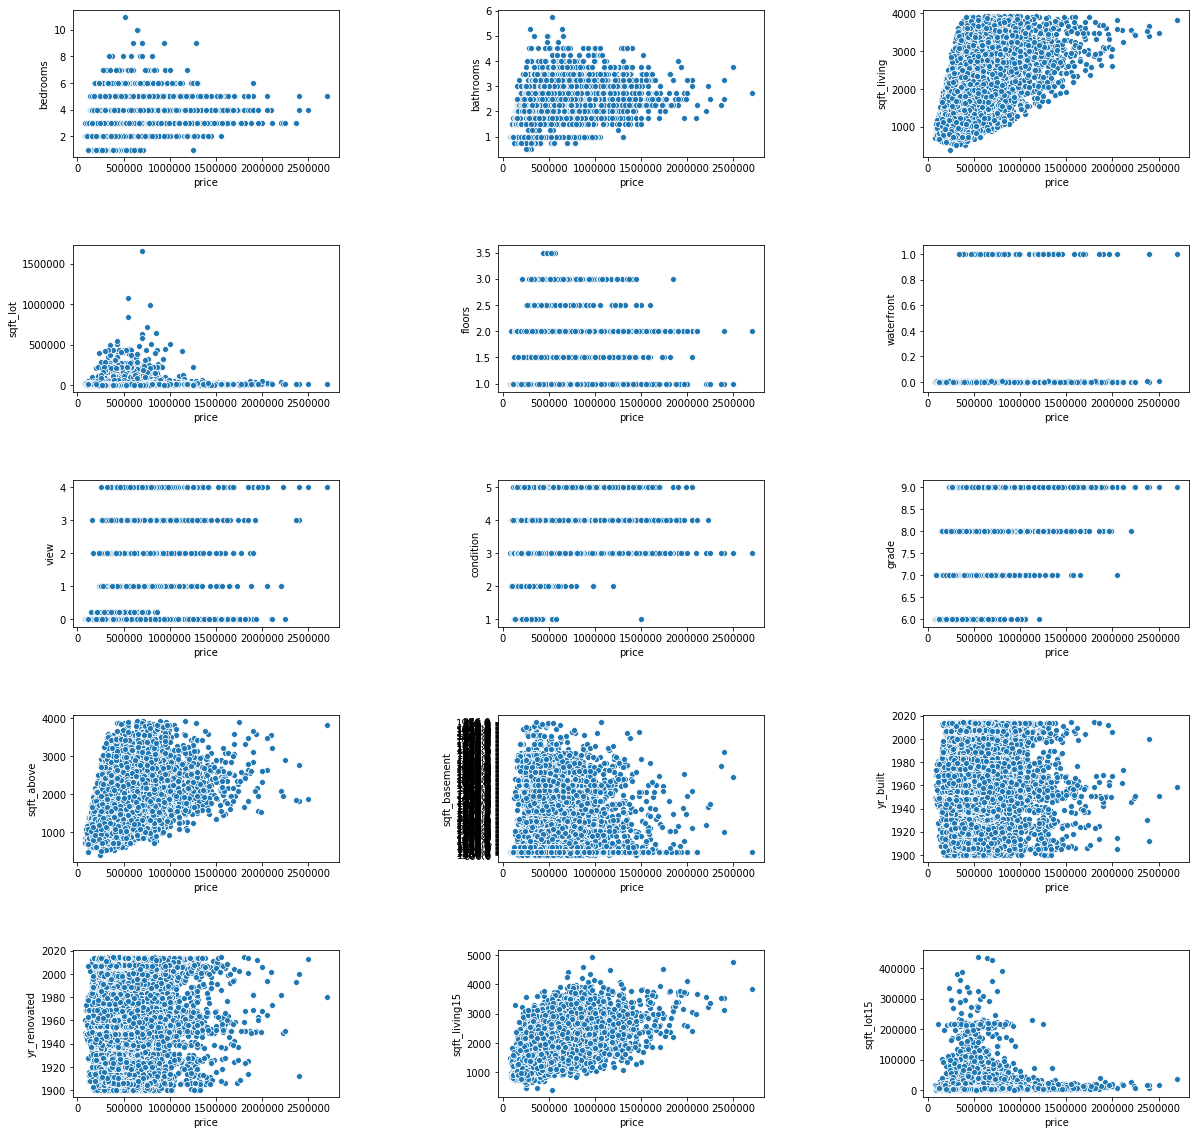

In [29]:

#Data Vizualization for outlier identification using seaborn  

plt.figure(figsize=(20,20))

for i, col in enumerate(Cols):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(x="price", y= col, data= houses)
    plt.subplots_adjust(wspace=0.6, hspace=0.6)

From the visualitazions we can identify which variables have a correlation with the price and to have an idea of outliners on the visualitazion. Some of the columns we could drop like Sqft_basement, yr_built, waterfront,view.

In [30]:
df_zip= houses.groupby('zipcode')
df_zip = df_zip.apply(lambda x: x.sample(n=15, replace = True))
display(df_zip.head())
display(df_zip.shape)

id       date     price  bedrooms  bathrooms  \
zipcode                                                               
98001   641    3329500060  7/28/2014  305000.0         4        2.5   
        20946  1278000210  3/11/2015  110000.0         2        1.0   
        9805   2730000070  8/14/2014  225000.0         3        1.0   
        18177  1311200120  5/13/2014  225000.0         3        1.0   
        322    3353400435  7/21/2014  230000.0         3        2.0   

               sqft_living  sqft_lot  floors  waterfront  view  ...  \
zipcode                                                         ...   
98001   641           2250      9091     1.0    0.000000   0.0  ...   
        20946          828      4524     1.0    0.000000   0.0  ...   
        9805          1120     10665     1.0    0.007596   0.0  ...   
        18177         1660      7210     1.0    0.000000   0.0  ...   
        322           1450     11204     1.0    0.000000   0.0  ...   

               sqft_above  sqft_basement  yr_built yr_renovated  zipcode  \
zipcode                                                                    
98001   641          1340          910.0      1982       1982.0    98001   
        20946         828            0.0      1968       2007.0    98001   
        9805         1120            0.0      1961       1961.0    98001   
        18177        1100          560.0      1963       1963.0    98001   
        322          1450            0.0      2003       2003.0    98001   

                   lat     long  sqft_living15  sqft_lot15  sqft_living_std  
zipcode                                                                      
98001   641    47.3360 -122.269           1540        7802       918.824411  
        20946  47.2655 -122.244            828        5402       918.824411  
        9805   47.2886 -122.274           1240       10639       918.824411  
        18177  47.3394 -122.281           1660        7245       918.824411  
        322    47.2639 -122.252           1520        9518       918.824411  

[5 rows x 22 columns]

(1050, 22)

In [31]:
new_df_zip=df_zip.drop(['id','date', 'waterfront','sqft_lot', 'view', 'condition','sqft_above'],axis=1)
new_df_zip=df_zip.drop(['id','date', 'waterfront','sqft_lot', 'view', 'condition','sqft_above'],axis=1)
display(new_df_zip.columns)
new_df_zip.drop(['sqft_basement', 'yr_renovated', 'zipcode', 'sqft_lot15'],axis=1, inplace= True)

display(new_df_zip.head())
corr_df = new_df_zip.corr().round(2)
corr_df.sort_values('sqft_living', ascending = False)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_std'],
      dtype='object')

price  bedrooms  bathrooms  sqft_living  floors  grade  \
zipcode                                                                    
98001   641    305000.0         4        2.5         2250     1.0      7   
        20946  110000.0         2        1.0          828     1.0      6   
        9805   225000.0         3        1.0         1120     1.0      6   
        18177  225000.0         3        1.0         1660     1.0      7   
        322    230000.0         3        2.0         1450     1.0      7   

               yr_built      lat     long  sqft_living15  sqft_living_std  
zipcode                                                                    
98001   641        1982  47.3360 -122.269           1540       918.824411  
        20946      1968  47.2655 -122.244            828       918.824411  
        9805       1961  47.2886 -122.274           1240       918.824411  
        18177      1963  47.3394 -122.281           1660       918.824411  
        322        2003  47.2639 -122.252           1520       918.824411

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built,lat,long,sqft_living15,sqft_living_std
sqft_living,0.58,0.61,0.67,1.00,0.31,0.67,0.24,0.13,0.18,0.70,0.0
sqft_living15,0.57,0.34,0.48,0.70,0.25,0.63,0.23,0.14,0.22,1.00,0.0
bathrooms,0.39,0.47,1.00,0.67,0.49,0.57,0.45,0.12,0.19,0.48,-0.0
grade,0.57,0.29,0.57,0.67,0.41,1.00,0.39,0.18,0.14,0.63,0.0
bedrooms,0.26,1.00,0.47,0.61,0.16,0.29,0.08,0.02,0.10,0.34,-0.0
price,1.00,0.26,0.39,0.58,0.21,0.57,-0.11,0.40,-0.05,0.57,-0.0
floors,0.21,0.16,0.49,0.31,1.00,0.41,0.45,0.05,0.10,0.25,-0.0
yr_built,-0.11,0.08,0.45,0.24,0.45,0.39,1.00,-0.13,0.39,0.23,0.0
long,-0.05,0.10,0.19,0.18,0.10,0.14,0.39,-0.07,1.00,0.22,-0.0
lat,0.40,0.02,0.12,0.13,0.05,0.18,-0.13,1.00,-0.07,0.14,0.0


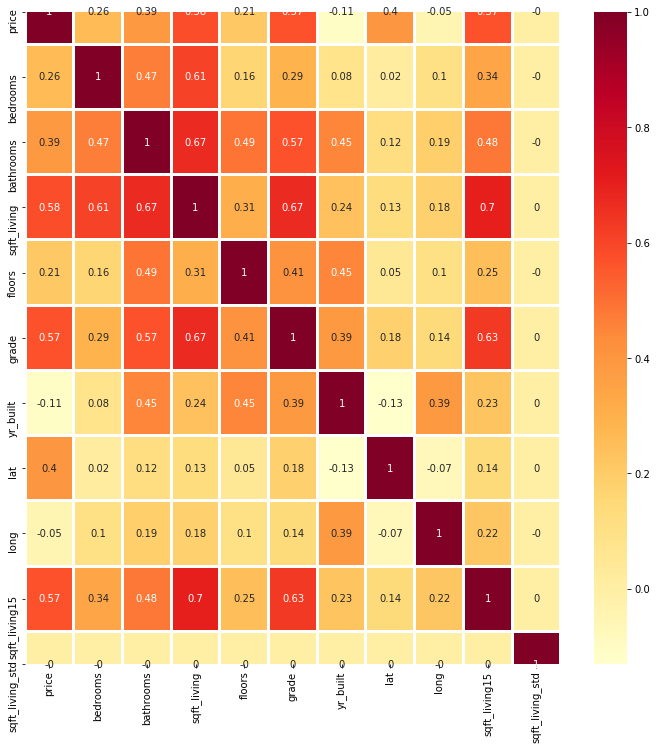

In [32]:

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(data = corr_df, annot = True, linewidth = 2, cmap= "YlOrRd")
plt.show()

In [33]:
#corr_df.isna().any()# Return which columns have missing or NaN values

Decision on parameters to build the model 

In [34]:
#Setting up variables for statistical analysis 

X = new_df_zip[['sqft_living', 'grade']]
Y = new_df_zip['price']

In [35]:
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(Y,X)

#Learning
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))

R2 = 0.4
const         -578092.4304
sqft_living       142.8541
grade          107798.6134
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     349.3
Date:                Tue, 21 Jan 2020   Prob (F-statistic):          5.98e-117
Time:                        14:19:57   Log-Likelihood:                -14376.
No. Observations:                1050   AIC:                         2.876e+04
Df Residuals:                    1047   BIC:                         2.877e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.781e+05   6.32e+04     -9.153      0.000   -7.02e+05   -4.54e+05
sqft_living   142.8541     12.845     11.121      0.000     117.649     168.059
grade        1.078e+05   1.03e+04     10.447      0.000    8.76e+04    1.28e+05
==============================================================================
Omnibus:                      435.651   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2628.652
Skew:                           1.807   Prob(JB):                         0.00
Kurtosis:                       9.857   Cond. No.                     1.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
type(results.params)
len(results.params)
# new_df_zip['sqft_living'].max()
Y_predict_price = results.params[0] + X_plot*results.params[1]
Y_predict_price.max()

421473045.56276906

Text(0, 0.5, 'House Price')

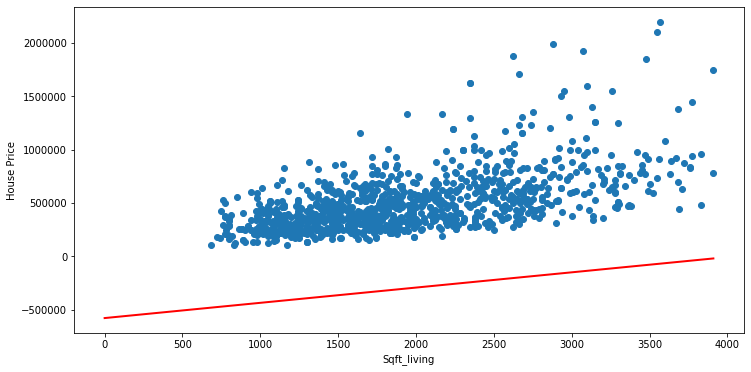

In [66]:
#Let's build and plot our regresion line of estimated value of price versus de sample data
fig, ax = plt.subplots(figsize=(12,6))
X_plot= np.linspace(0,new_df_zip['sqft_living'].max(),1000)
Y_predict_price = results.params[0] + X_plot*results.params[1] 
ax.scatter(new_df_zip['sqft_living'],new_df_zip['price'])
ax.plot(X_plot,Y_predict_price, color="red", linewidth=2.00)
plt.xlabel ('Sqft_living')
plt.ylabel ('House Price')

